#Zadanie 1a (3 pkt)
Celem zadania jest rozwiązanie problemu plecakowego dwoma metodami - brute force oraz według zadanej heurystyki. Należy zaimplementować metody klasy *KnapSack* - *solve_knapsack_brute_force* oraz *solve_knapsack_pw_ratio*. Poprzez rozwiązanie problemu rozumiemy podanie które przedmioty (indeksy w tablicy) należy spakować do plecaka oraz jaka jest sumaryczna wartość i masa plecaka. Punktacja wygląda następująco:


*   Rozwiązanie problemu metodą brute force. *Podpowiedź: do wygenerowania wszystkich permutacji można użyć funkcji product z biblioteki itertools* - **1.5 pkt**
*   Rozwiązanie problemu według heurystyki - do plecaka pakujemy przedmioty według stosunku wartości do wagi - **1 pkt**
*   Dla metody brute force proszę wygenerować wykres zależności czasu wykonywania metody od liczby elementów w tablicach *weights* i *profits* (do obu tablic należy stopniowo dopisywać po jednym elemencie, np. 10-krotnie, wartości elementów nie mają znaczenia). Proszę również odpowiedzieć na pytania (w osobnej komórce tekstowej) - czy obie metody mają takie same rozwiązania? Jakie są Pani / Pana wnioski? - **0.5 pkt**




In [46]:
import numpy as np
from itertools import product
from matplotlib import pyplot as plt
import time

In [47]:
weights = np.array([8, 3, 5, 2])
capacity = 9
profits = np.array([16, 8, 9, 6])

In [48]:
class KnapSack:
  def __init__(self, profits, weights, capacity):
    self.profits = profits
    self.weights = weights
    self.capacity = capacity

  def solve_knapsack_brute_force(self):
    choices = list(product(range(2), repeat=len(self.profits)))
    result = {'indexes':[], 'value': 0, 'weight': 0,}
    for choice in choices:
      indexes = [i for i in range(len(choice)) if choice[i]]
      weight = sum([self.weights[i]*choice[i] for i in range(len(profits))])
      value = sum([self.profits[i]*choice[i] for i in range(len(profits))])
      if weight < self.capacity and weight > result.get('weight'):
        result['indexes'], result['value'], result['weight'] = indexes, value, weight
    return result

  def solve_knapsack_pw_ratio(self):
    weights_with_profits = sorted(list(zip([self.profits[i]/self.weights[i] for i in range(len(self.weights))], range(len(self.weights)))), key=lambda l: l[0], reverse=True)
    elements, value, weight, not_full= [], 0, 0, True
    for _, idx in weights_with_profits:
      if weight + weights[idx] > self.capacity:
        not_full = False
      if not_full:
        elements.append(idx)
        value += self.profits[idx]
        weight += self.weights[idx]
    return [elements, value, weight]


In [49]:
#knapsack = KnapSack(profits, weights, capacity)
#print(knapsack.solve_knapsack_brute_force())
#print(knapsack.solve_knapsack_pw_ratio())

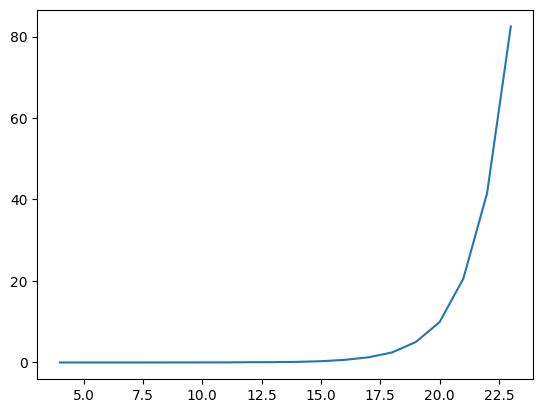

In [61]:
def create_plot():
    knapsack = KnapSack(list(profits), list(weights), capacity)
    results = []
    length = 20
    for i in range(length):
        start = time.time()
        knapsack.solve_knapsack_brute_force()
        delta = time.time()-start
        results.append(delta)
        knapsack.profits.append(i)
        knapsack.weights.append(1)
        knapsack.capacity += 1
    plt.plot(range(4, length + 4), results)
    plt.show()

create_plot()